In [13]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
FILTER_DEPT = "HOBBIES_2" # Use only
ID_COLS = ['store_id', 'item_id'] # Columns to be considered in analysis
N_LAST_DAYS = 60 # Number of days for grouping sales

In [17]:
df = pd.read_csv("../data/sales_train_evaluation.csv")

df.head()

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [18]:
df.groupby('dept_id')['item_id'].nunique()

dept_id
FOODS_1        216
FOODS_2        398
FOODS_3        823
HOBBIES_1      416
HOBBIES_2      149
HOUSEHOLD_1    532
HOUSEHOLD_2    515
Name: item_id, dtype: int64

In [19]:
df_prep = df[df.dept_id == FILTER_DEPT]

df_prep = df_prep.set_index(ID_COLS)[df.columns[-N_LAST_DAYS:]].stack()

df_prep = df_prep.groupby(ID_COLS).sum().reset_index()

df_prep.columns = ID_COLS + ['sale_quantity']

df_prep.head()

,store_id,item_id,sale_quantity
0,CA_1,HOBBIES_2_001,11
1,CA_1,HOBBIES_2_002,9
2,CA_1,HOBBIES_2_003,19
3,CA_1,HOBBIES_2_004,24
4,CA_1,HOBBIES_2_005,11


### Item-Store Collaborative Filtering

In [20]:
df_matrix = pd.pivot_table(df_prep, values='sale_quantity', index='store_id', columns='item_id')
df_matrix

item_id,HOBBIES_2_001,HOBBIES_2_002,HOBBIES_2_003,HOBBIES_2_004,HOBBIES_2_005,HOBBIES_2_006,HOBBIES_2_007,HOBBIES_2_008,HOBBIES_2_009,HOBBIES_2_010,...,HOBBIES_2_140,HOBBIES_2_141,HOBBIES_2_142,HOBBIES_2_143,HOBBIES_2_144,HOBBIES_2_145,HOBBIES_2_146,HOBBIES_2_147,HOBBIES_2_148,HOBBIES_2_149
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,11,9,19,24,11,17,25,8,23,3,...,14,18,0,14,21,20,3,21,20,18
CA_2,5,10,38,11,11,2,19,13,41,0,...,19,23,101,38,21,6,20,16,13,22
CA_3,10,13,60,18,7,11,25,14,1,6,...,54,20,113,18,11,38,17,23,19,31
CA_4,3,4,7,4,3,4,10,7,14,1,...,9,4,15,0,0,5,3,3,2,11
TX_1,2,0,57,20,7,0,15,6,34,17,...,6,3,0,8,20,26,9,70,12,26
TX_2,12,19,51,10,11,10,18,14,78,11,...,37,29,85,8,28,24,11,38,5,43
TX_3,12,13,63,25,6,3,14,14,0,16,...,70,24,81,56,21,16,9,35,21,27
WI_1,2,2,1,5,12,5,22,11,27,4,...,10,22,46,10,9,26,6,12,6,19
WI_2,1,21,19,11,7,1,8,10,10,5,...,22,9,102,0,5,18,3,19,1,18


In [28]:
df_matrix_norm

item_id,HOBBIES_2_001,HOBBIES_2_002,HOBBIES_2_003,HOBBIES_2_004,HOBBIES_2_005,HOBBIES_2_006,HOBBIES_2_007,HOBBIES_2_008,HOBBIES_2_009,HOBBIES_2_010,...,HOBBIES_2_140,HOBBIES_2_141,HOBBIES_2_142,HOBBIES_2_143,HOBBIES_2_144,HOBBIES_2_145,HOBBIES_2_146,HOBBIES_2_147,HOBBIES_2_148,HOBBIES_2_149
store_id,,,,,,,,,,,,,,,,,,,,,
CA_1,2.401032,1.280786,0.811401,3.031478,3.825846,3.078776,3.315859,2.271847,0.996334,0.484966,...,0.664577,1.991008,0.000000,0.791341,2.294933,2.015171,0.496564,1.103126,2.702538,1.932396
CA_2,1.091378,1.423096,1.622803,1.389427,3.825846,0.362209,2.520052,3.691752,1.776074,0.000000,...,0.901926,2.544065,2.262953,2.147925,2.294933,0.604551,3.310424,0.840477,1.756650,2.361817
CA_3,2.182756,1.850025,2.562320,2.273609,2.434629,1.992149,3.315859,3.975733,0.043319,0.969931,...,2.563368,2.212231,2.531818,1.017438,1.202108,3.828825,2.813860,1.208186,2.567411,3.328015
CA_4,0.654827,0.569238,0.298937,0.505246,1.043413,0.724418,1.326343,1.987866,0.606464,0.161655,...,0.427228,0.442446,0.336082,0.000000,0.000000,0.503793,0.496564,0.157589,0.270254,1.180908
TX_1,0.436551,0.000000,2.434204,2.526232,2.434629,0.000000,1.989515,1.703886,1.472842,2.748138,...,0.284819,0.331835,0.000000,0.452195,2.185651,2.619722,1.489691,3.677087,1.621523,2.791238
TX_2,2.619308,2.703883,2.177972,1.263116,3.825846,1.811045,2.387418,3.975733,3.378872,1.778207,...,1.756382,3.207734,1.904465,0.452195,3.059911,2.418205,1.820733,1.996133,0.675635,4.616278
TX_3,2.619308,1.850025,2.690436,3.157790,2.086825,0.543313,1.856881,3.975733,0.000000,2.586483,...,3.322885,2.654677,1.814843,3.165363,2.294933,1.612137,1.489691,1.838544,2.837665,2.898593
WI_1,0.436551,0.284619,0.042705,0.631558,4.173650,0.905522,2.917956,3.123790,1.169610,0.646621,...,0.474698,2.433454,1.030652,0.565243,0.983543,2.619722,0.993127,0.630358,0.810761,2.039751
WI_2,0.218276,2.988502,0.811401,1.389427,2.434629,0.181104,1.061075,2.839809,0.433189,0.808276,...,1.044335,0.995504,2.285358,0.000000,0.546413,1.813654,0.496564,0.998067,0.135127,1.932396


In [44]:
df_matrix_norm.iloc[:,:10]

item_id,HOBBIES_2_001,HOBBIES_2_002,HOBBIES_2_003,HOBBIES_2_004,HOBBIES_2_005,HOBBIES_2_006,HOBBIES_2_007,HOBBIES_2_008,HOBBIES_2_009,HOBBIES_2_010
store_id,,,,,,,,,,
CA_1,2.401032,1.280786,0.811401,3.031478,3.825846,3.078776,3.315859,2.271847,0.996334,0.484966
CA_2,1.091378,1.423096,1.622803,1.389427,3.825846,0.362209,2.520052,3.691752,1.776074,0.000000
CA_3,2.182756,1.850025,2.562320,2.273609,2.434629,1.992149,3.315859,3.975733,0.043319,0.969931
CA_4,0.654827,0.569238,0.298937,0.505246,1.043413,0.724418,1.326343,1.987866,0.606464,0.161655
TX_1,0.436551,0.000000,2.434204,2.526232,2.434629,0.000000,1.989515,1.703886,1.472842,2.748138
TX_2,2.619308,2.703883,2.177972,1.263116,3.825846,1.811045,2.387418,3.975733,3.378872,1.778207
TX_3,2.619308,1.850025,2.690436,3.157790,2.086825,0.543313,1.856881,3.975733,0.000000,2.586483
WI_1,0.436551,0.284619,0.042705,0.631558,4.173650,0.905522,2.917956,3.123790,1.169610,0.646621
WI_2,0.218276,2.988502,0.811401,1.389427,2.434629,0.181104,1.061075,2.839809,0.433189,0.808276


<AxesSubplot:xlabel='item_id', ylabel='store_id'>

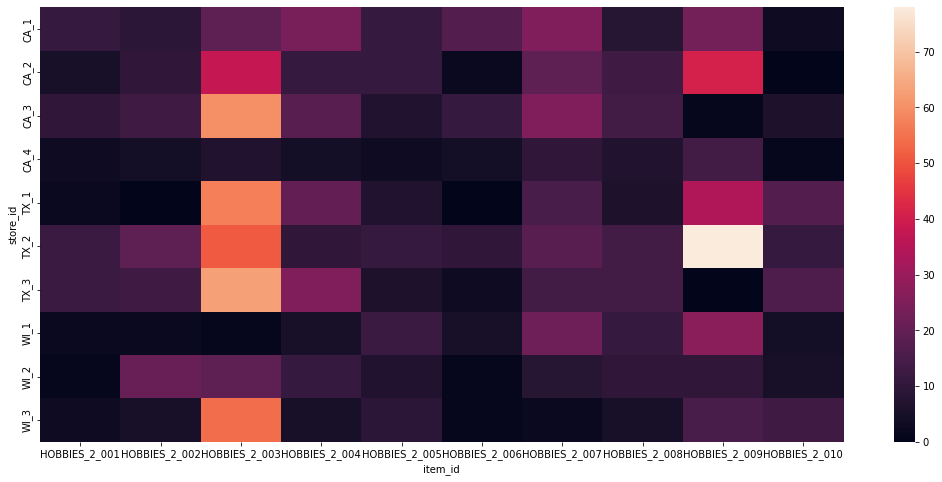

In [46]:
df_matrix_norm = df_matrix.apply(lambda x: (x)/x.std(), axis = 0)

f, ax = plt.subplots(1,1, figsize=(18,8))

sns.heatmap(data=df_matrix.iloc[:,:10], ax=ax)